In [35]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns


from gensim.models.keyedvectors import KeyedVectors

df = pd.read_csv('../data/processed/wordgame_201706_basicfeatures.csv', dtype={'nt': np.bool})
#store words as string
df['word1'] = df['word1'].astype('str') 
df['word2'] = df['word2'].astype('str') 
print(df.dtypes)

df['word1'] = df['word1'].map(str).apply(lambda x: x.lower())
df['word2'] = df['word2'].map(str).apply(lambda x: x.lower())

df.head(30)

author        int64
word1        object
word2        object
source       object
sourceID      int64
nt             bool
len1          int64
len2          int64
d_len         int64
edit          int64
n_edit      float64
dtype: object


,author,word1,word2,source,sourceID,nt,len1,len2,d_len,edit,n_edit
0,4688,crows,feet,the_fishy,8,True,5,4,1,5,0.121951
1,4841,salute,respect,the_fishy,8,True,6,7,1,6,0.070588
2,1732,pride,arrogance,gog,5,True,5,9,4,7,0.066038
3,1272,knife,butter,gog,5,True,5,6,1,5,0.081967
4,418,bed head,my hair right now,atu2,1,True,8,17,9,15,0.042493
5,383,emotion,feeling,atu2,1,True,7,7,0,6,0.061224
6,3213,drive,taxi,sas,7,True,5,4,1,5,0.121951
7,4688,faraway,distant,the_fishy,8,True,7,7,0,7,0.071429
8,483,respect,relevant,atu2,1,True,7,8,1,5,0.044248
9,1804,suburb,downtown,gog,5,True,6,8,2,8,0.080000


In [2]:
print('Loading word embeddings...')
w2v_model = KeyedVectors.load_word2vec_format('../data/external/GoogleNews-vectors-negative300.bin', binary=True)

Loading word embeddings...


In [37]:
def similarity(r):

	if (r.word1 in w2v_model.vocab) & (r.word2 in w2v_model.vocab):
		wv1 = w2v_model.word_vec(r.word1)
		wv2 = w2v_model.word_vec(r.word2)
		
		return w2v_model.similarity(r.word1, r.word2)
	else:
		return 100


df['sim'] = df.apply(similarity, axis=1) 

In [38]:
# remove 
df = df[df['sim'] <= 1.0]

lowlen = len(df)
print(df['sim'].mean())

0.265027306496


Number of posts: 4044
1234
     author  word1      word2 source  sourceID    nt  len1  len2  d_len  edit  \
171    4423  study   headache    sas         7  True     5     8      3     7   
213    4423  truth  righteous    sas         7  True     5     9      4     8   
307    4423   work   drudgery    sas         7  True     4     8      4     7   
385    4423    ato       bomb    sas         7  True     3     4      1     4   
425    4423    hay       shed    sas         7  True     3     4      1     3   

       n_edit       sim  
171  0.078652  0.038852  
213  0.075472  0.353832  
307  0.087500  0.303096  
385  0.160000  0.017955  
425  0.120000  0.187303  
      author     word1         word2        source  sourceID     nt  len1  \
971      235   arrears         taxes  aspiecentral         0  False     7   
1010     235  neighbor  neighborhood  aspiecentral         0  False     8   
1113     235     dairy      business  aspiecentral         0  False     5   
1438     235      guts

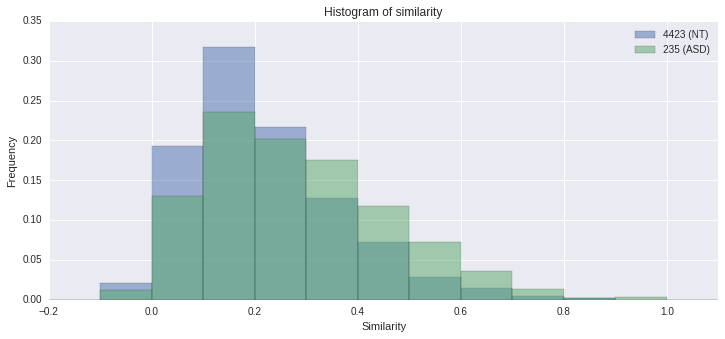

In [94]:
import matplotlib.pyplot as plt

## plot
#nt = df[df['nt']]
#asd = df[df['nt']==False]

nt = df[df['author']==4423]
asd = df[df['author']==235]

print("Number of posts: " + str(len(nt)))
print(len(asd))

print(nt.head())
print(asd.head())

nt = nt.sim
asd = asd.sim

print(nt.mean())
print(asd.mean())

w1 = np.ones_like(nt)/len(nt)
w2 = np.ones_like(asd)/len(asd)

bins = np.arange(-2,2,0.1)

plt.figure(figsize=(12, 5))
plt.hist(nt, bins=bins, alpha=0.5, label="4423 (NT)", weights=w1)
plt.hist(asd, bins=bins,alpha=0.5, label="235 (ASD)", weights=w2)
plt.title('Histogram of similarity')
plt.xlabel('Similarity')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
axes = plt.gca()
axes.set_xlim([-0.2,1.1])
plt.show()

Sh*t! shit shit shit :(

1 -> same word
aspiecentral -> lower similarity
wrongplanet -> higher similarity

